UMBRALIZACION ISODATA

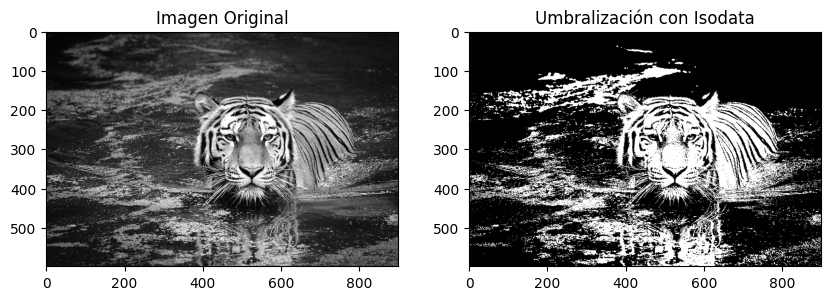

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Función que aplica la umbralización global con el algoritmo de Isodata
def isodata(image):
    # Umbral inicial decidimos del espectro de 0 a 255
    threshold = 128
    
    while True:
        # Se divide la imagen en dos grupos según el umbral
        
        groupo1 = image[image <= threshold] # grupo donde el umbral es menor o igual al determinado
        groupo2 = image[image > threshold] # grupo donde el umbral es mayor al determinado
        
        # Se calcula la media de cada grupo
        media1 = np.mean(groupo1)
        media2 = np.mean(groupo2)
        
        # Nuevo umbral
        nuevo_umbral = (media1 + media2) / 2 # segun formula 
        
        # Si el nuevo umbral es igual al umbral anterior, se detiene el bucle
        if abs(nuevo_umbral - threshold) < 0.5:
            break
        
        threshold = nuevo_umbral
    
    return threshold

# imagen en canal 0
imagen = cv2.imread('E:/tiger.jpg', 0)

# llamamos a funcion con imagen seleccionada 
umbral_isodata = isodata(imagen)

# Umbralización de la imagen
_, imagen_umbralizada = cv2.threshold(imagen, umbral_isodata, 255, cv2.THRESH_BINARY) #OJO el "_" es una variable pero que ignoramos (almacena el valor del umbral) 

# Mostramos la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')


plt.subplot(1, 2, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralización con Isodata')


plt.show()

UMBRAL CON LA TECNICA DE DOS PICOS 

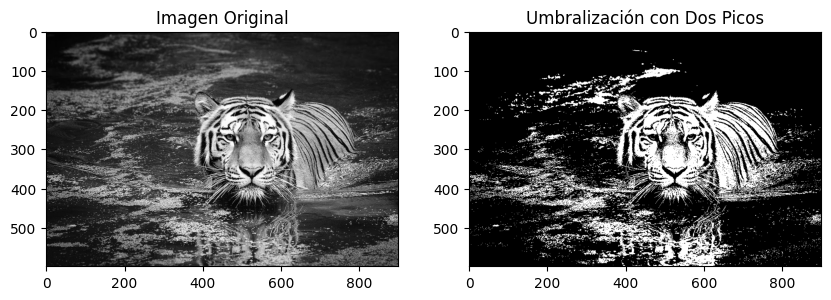

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para aplicar la umbralización global con el algoritmo de dos picos
def dos_picos(image):
    # Calculamos el histograma de la imagen
    hist = cv2.calcHist([image],[0],None,[256],[0,256])# EN ESTE CASO SI O SO HACEMOS USO DEL HISTOGRAMA
    
    # Encontramos los dos picos en el histograma
    pico = np.array(hist)# almacenamos los picos en un array 
    pico = pico.flatten()#aplana el array a una dimension
    pico_diff = np.diff(pico)#buscamos diferencias entre los datos
    primer_pico = np.argmax(pico_diff[:128]) # buscamos el pico hasta 127
    segundo_pico = np.argmax(pico_diff[128:]) + 128 # buscamos el pico desde 128 para adelante 
    
    # El umbral se toma como el promedio de los dos picos
    umbral = int((primer_pico + segundo_pico) / 2)
    
    return umbral

# Cargamos la imagen en escala de grises
imagen = cv2.imread('E:/tiger.jpg', 0)

# Aplicamos la umbralización global con el algoritmo de dos picos
umbral_dos_picos = dos_picos(imagen)

# Umbralización de la imagen
_, imagen_umbralizada = cv2.threshold(imagen, umbral_dos_picos, 255, cv2.THRESH_BINARY)

# Mostramos la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')


plt.subplot(1, 2, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralización con Dos Picos')


plt.show()

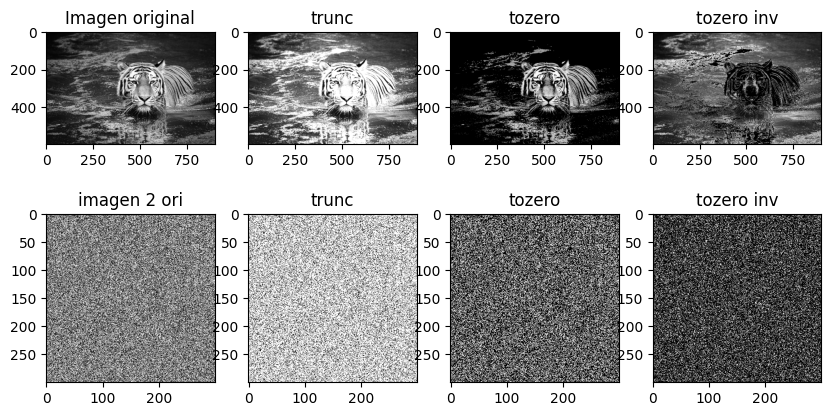

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('E:/tiger.jpg',0)
imagen2 = np.random.randint(0,255,(300,300),dtype=np.uint8) #generando imagen colo, tamaño imagen, tamaño bits

_,umb_trunc=cv2.threshold(imagen,127,200,cv2.THRESH_TRUNC)
_,umb_tozero=cv2.threshold(imagen,127,255,cv2.THRESH_TOZERO)
_,umb_tozero_INV=cv2.threshold(imagen,127,255,cv2.THRESH_TOZERO_INV)

_,umb_trunc2 = cv2.threshold(imagen2, 127, 200, cv2.THRESH_TRUNC)
_,umb_tozero2 = cv2.threshold(imagen2, 127, 200, cv2.THRESH_TOZERO)
_,umb_tozero_inv2 = cv2.threshold(imagen2, 127, 200, cv2.THRESH_TOZERO_INV)


plt.figure(figsize=(10, 5))

plt.subplot(2, 4, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen original')

plt.subplot(2, 4, 2)
plt.imshow(umb_trunc, cmap='gray')
plt.title('trunc')

plt.subplot(2, 4, 3)
plt.imshow(umb_tozero, cmap='gray')
plt.title('tozero')

plt.subplot(2,4 , 4)
plt.imshow(umb_tozero_INV, cmap='gray')
plt.title('tozero inv')

   

plt.subplot(2, 4, 5)
plt.imshow(imagen2, cmap='gray')
plt.title('imagen 2 ori')

plt.subplot(2, 4, 6)
plt.imshow(umb_trunc2, cmap='gray')
plt.title('trunc')

plt.subplot(2, 4, 7)
plt.imshow(umb_tozero2, cmap='gray')
plt.title('tozero')

plt.subplot(2,4 , 8)
plt.imshow(umb_tozero_inv2, cmap='gray')
plt.title('tozero inv')



plt.show()





